# Music Over the Decades

Music has been a significant part of society for thousands of years. As a result, humanity has seen a wide varitey of styles, instruments, genres, etc. In the last century, the world of music has seen many changes. Technology allowed music to be recorded and played on discs. Now music can easily be streamed from personal devices through services like Spotify. The technologies for making music changed too. Computers can now be used to create and mix sounds, rhythms, and whole songs.

So how has music changed? Can we see changes by looking at data? What kinds of relationships does music have with the time period in which it is created? These are some questions we hope to answer by going through the data science pipeline.

In this tutorial, we will use the Spotify API to look at popular music over the decades. Specifically, we will look at the All Out 50's, 60's, 70's, 80's, 90's, 00's, and 10's playlists created by Spotify. This should provide us with a sufficient overview of popular music in the last century.


### Part 1: Data Collection

First things first, we need to collect our data. We will be using the Spotipy python library to interact with Spotify. The following steps allow us to use the Spotify API. Instructions for how to set up environment variables can easily be found on the Spotipy website which I have linked at the end of this tutorial. Once we install Spotipy and set up our environment variables, we're ready to start.

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager) 

Now that we have access to Spotiy, we need to get our playlists and songs along with all of their data so we can perform some analysis. The two blocks of code below are functions found from another tutorial on How to Create Large Music Datasets Using Spotipy by Max Hilsdorf, link here: https://towardsdatascience.com/how-to-create-large-music-datasets-using-spotipy-40e7242cc6a6

I have made some minor modifications to these functions, but they operate the same way as in the linked tutorial. We will use the analyze_playlist function to loop over all tracks in a playlist and store specific data related to each song in a dataframe. The second function, analyze_playlist_dict, will be used to concatenate the dataframes from each individual playlist into one large dataframe.

In [2]:
def analyze_playlist(playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist", "album", "track_name", "track_id", "popularity", "explicit",
                              "danceability", "energy", "speechiness", "instrumentalness",
                              "acousticness", "liveness", "loudness", "valence", 
                              "mode", "key", "tempo", "duration_ms", "time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    playlist = sp.playlist_tracks(playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        playlist_features["popularity"] = track["track"]["popularity"]
        playlist_features["explicit"] = track["track"]["explicit"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[6:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [3]:
def analyze_playlist_dict(playlist_dict):
    i = 0
    # Loop through every playlist in the dict and analyze it
    for name, playlist_id in playlist_dict.items():
        playlist_df = analyze_playlist(playlist_id)
        # Add a playlist column so that we can see which playlist a track belongs too
        playlist_df["playlist"] = name
        #Create or concat df
        if i == 0:
            playlist_dict_df = playlist_df
        else:
            playlist_dict_df = pd.concat([playlist_dict_df, playlist_df], ignore_index = True)
        i += 1
        
    return playlist_dict_df

In order to access playlists, we need their playlist URI's. These can easily be found in the Spotify desktop app. The seven URI's for the mentioned playlists are stored in a dictionary below.

In [4]:
decades_URIs = {
    '50s' : 'spotify:playlist:37i9dQZF1DWSV3Tk4GO2fq',
    '60s' : 'spotify:playlist:37i9dQZF1DXaKIA8E7WcJj',
    '70s' : 'spotify:playlist:37i9dQZF1DWTJ7xPn4vNaz',
    '80s' : 'spotify:playlist:37i9dQZF1DX4UtSsGT1Sbe',
    '90s' : 'spotify:playlist:37i9dQZF1DXbTxeAdrVG2l',
    '00s' : 'spotify:playlist:37i9dQZF1DX4o1oenSJRJd',
    '10s' : 'spotify:playlist:37i9dQZF1DX5Ejj0EkURtP'
}

Now all we have to do is pass this dict into the second function above to get our beast of a dataframe.

In [5]:
df = analyze_playlist_dict(decades_URIs)

display(df)

,artist,album,track_name,track_id,popularity,explicit,danceability,energy,speechiness,instrumentalness,acousticness,liveness,loudness,valence,mode,key,tempo,duration_ms,time_signature,playlist
0,Bill Haley & His Comets,Rock Around The Clock,(We're Gonna) Rock Around The Clock,1uRKT2LRANv4baowBWHfDS,64,False,0.811,0.859,0.1680,3.73e-06,0.20500,0.0761,-6.317,0.784,1,9,90.686,129893,4,50s
1,Jackie Wilson,He's So Fine,Reet Petite,3h4udS0WeWbsur3yfjvnm4,60,False,0.664,0.660,0.1300,0,0.44700,0.2980,-6.526,0.873,1,5,84.345,169240,4,50s
2,Cliff Richard,Stronger Thru the Years,Living Doll - 2003 Remaster,3koJ1vDWEITIrfMlNaHIu3,46,False,0.572,0.463,0.0517,0,0.52700,0.0958,-7.782,0.764,1,9,62.658,156787,4,50s
3,Various Artists,Fabulous Fifties Nostalgia Vol 5,All I Have to Do Is Dream,72nqbbrKjhXmDdRXQGq115,0,False,0.542,0.347,0.0268,0,0.78300,0.1440,-14.011,0.596,1,4,103.709,141240,4,50s
4,Fats Domino,Legends Of Rock n' Roll,I'm Walkin',07TQDFaoLBwvo6JU1nnaiU,47,False,0.729,0.555,0.0483,0.184,0.67800,0.1550,-13.056,0.979,1,1,109.005,135093,4,50s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Jason Derulo,Everything Is 4,Want to Want Me,7oGZAicScQt96OAW4AruYy,76,False,0.775,0.680,0.0629,0,0.00906,0.1090,-5.508,0.656,0,0,114.025,207719,4,10s
696,Hozier,Hozier,Take Me To Church,3dYD57lRAUcMHufyqn9GcI,82,False,0.566,0.664,0.0464,0,0.63400,0.1160,-5.303,0.437,0,4,128.945,241688,4,10s
697,OMI,Me 4 U,Cheerleader - Felix Jaehn Remix Radio Edit,7vFoFDWqTX0mHzLfrF1Cfy,76,False,0.782,0.685,0.0309,1.18e-05,0.16600,0.1600,-6.237,0.603,1,4,118.016,180566,4,10s
698,Mark Ronson,Uptown Special,Uptown Funk (feat. Bruno Mars),32OlwWuMpZ6b0aN2RZOeMS,82,False,0.856,0.609,0.0824,8.15e-05,0.00801,0.0344,-7.223,0.928,1,0,114.988,269667,4,10s


## Part 2: Data Cleaning

We want this data looking nice before we start graphing it, so we need to clean it. Thankfully, Spotify is thorough so the data we have is pretty complete and does not require much cleaning at all. One thing we will do is change the duration of the songs from milliseconds to minutes. We also have to adjust the typing of some of the categories so they can be graphed properly. Other than that, we have no NaN values to take care of and no strange data so we are done with that. 

In [6]:
df['duration_ms'] = df['duration_ms'].astype('float').div(60000) # change duration to minutes
df.rename(columns={'duration_ms' : 'duration_min'}, inplace=True)

df['popularity'] = df['popularity'].astype(float)
df['instrumentalness'] = df['instrumentalness'].astype(float)

display(df)

,artist,album,track_name,track_id,popularity,explicit,danceability,energy,speechiness,instrumentalness,acousticness,liveness,loudness,valence,mode,key,tempo,duration_min,time_signature,playlist
0,Bill Haley & His Comets,Rock Around The Clock,(We're Gonna) Rock Around The Clock,1uRKT2LRANv4baowBWHfDS,64.0,False,0.811,0.859,0.1680,0.000004,0.20500,0.0761,-6.317,0.784,1,9,90.686,2.164883,4,50s
1,Jackie Wilson,He's So Fine,Reet Petite,3h4udS0WeWbsur3yfjvnm4,60.0,False,0.664,0.660,0.1300,0.000000,0.44700,0.2980,-6.526,0.873,1,5,84.345,2.820667,4,50s
2,Cliff Richard,Stronger Thru the Years,Living Doll - 2003 Remaster,3koJ1vDWEITIrfMlNaHIu3,46.0,False,0.572,0.463,0.0517,0.000000,0.52700,0.0958,-7.782,0.764,1,9,62.658,2.613117,4,50s
3,Various Artists,Fabulous Fifties Nostalgia Vol 5,All I Have to Do Is Dream,72nqbbrKjhXmDdRXQGq115,0.0,False,0.542,0.347,0.0268,0.000000,0.78300,0.1440,-14.011,0.596,1,4,103.709,2.354000,4,50s
4,Fats Domino,Legends Of Rock n' Roll,I'm Walkin',07TQDFaoLBwvo6JU1nnaiU,47.0,False,0.729,0.555,0.0483,0.184000,0.67800,0.1550,-13.056,0.979,1,1,109.005,2.251550,4,50s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Jason Derulo,Everything Is 4,Want to Want Me,7oGZAicScQt96OAW4AruYy,76.0,False,0.775,0.680,0.0629,0.000000,0.00906,0.1090,-5.508,0.656,0,0,114.025,3.461983,4,10s
696,Hozier,Hozier,Take Me To Church,3dYD57lRAUcMHufyqn9GcI,82.0,False,0.566,0.664,0.0464,0.000000,0.63400,0.1160,-5.303,0.437,0,4,128.945,4.028133,4,10s
697,OMI,Me 4 U,Cheerleader - Felix Jaehn Remix Radio Edit,7vFoFDWqTX0mHzLfrF1Cfy,76.0,False,0.782,0.685,0.0309,0.000012,0.16600,0.1600,-6.237,0.603,1,4,118.016,3.009433,4,10s
698,Mark Ronson,Uptown Special,Uptown Funk (feat. Bruno Mars),32OlwWuMpZ6b0aN2RZOeMS,82.0,False,0.856,0.609,0.0824,0.000082,0.00801,0.0344,-7.223,0.928,1,0,114.988,4.494450,4,10s


Before we move on, let's prepare a dataframe with exclusively numerical data. This will be useful later on when do some machine learning. We'll just copy the dataframe and drop the non-numercal columns like name. We'll also drop mode and time signature as those are not important.

In [7]:
numerical = df.copy()
numerical.drop(columns=['artist', 'album', 'track_name', 'track_id', 'explicit', 'mode', 'time_signature'], inplace=True)
display(numerical)

,popularity,danceability,energy,speechiness,instrumentalness,acousticness,liveness,loudness,valence,key,tempo,duration_min,playlist
0,64.0,0.811,0.859,0.1680,0.000004,0.20500,0.0761,-6.317,0.784,9,90.686,2.164883,50s
1,60.0,0.664,0.660,0.1300,0.000000,0.44700,0.2980,-6.526,0.873,5,84.345,2.820667,50s
2,46.0,0.572,0.463,0.0517,0.000000,0.52700,0.0958,-7.782,0.764,9,62.658,2.613117,50s
3,0.0,0.542,0.347,0.0268,0.000000,0.78300,0.1440,-14.011,0.596,4,103.709,2.354000,50s
4,47.0,0.729,0.555,0.0483,0.184000,0.67800,0.1550,-13.056,0.979,1,109.005,2.251550,50s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,76.0,0.775,0.680,0.0629,0.000000,0.00906,0.1090,-5.508,0.656,0,114.025,3.461983,10s
696,82.0,0.566,0.664,0.0464,0.000000,0.63400,0.1160,-5.303,0.437,4,128.945,4.028133,10s
697,76.0,0.782,0.685,0.0309,0.000012,0.16600,0.1600,-6.237,0.603,4,118.016,3.009433,10s
698,82.0,0.856,0.609,0.0824,0.000082,0.00801,0.0344,-7.223,0.928,0,114.988,4.494450,10s


## Part 3: Data Exploration and Vizualization

Let's take our data and make some plots. We can plot a number of variables against each other here, but since we are looking at music over the decades let us use the decade as one of the variables. Information about each variable can be found in the Spotify API documentation, links are below.

First we'll look at danceability. This is a measure of how good a track is for dancing and ranges 0.0 to 1.0.

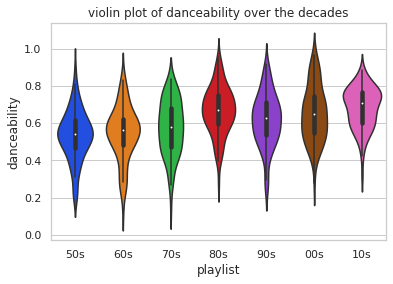

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', palette='bright') # style of the plot, bright colors look nice

plt.title('violin plot of danceability over the decades') # want to make sure we title our plots
ax = sns.violinplot(x=df['playlist'], y=df['danceability']) # violin plot looking at danceability

Based on this plot, we can see that music in the 80s and 10s is more danceable than other decades.

Next we'll look at acousticness. Higher values represent higher confidence in whether a track is acoustic. This ranges 0.0 to 1.0.

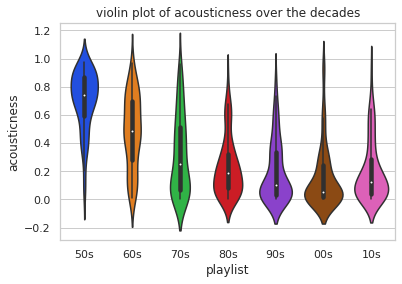

In [9]:
plt.title('violin plot of acousticness over the decades')
ax = sns.violinplot(x=df['playlist'], y=df['acousticness'])

The distribution of this plot is interesting. We see that older songs (50's and 60's) are much more likely to be acoustic than newer songs (90's and up). This makes sense, as advanced electronic music making capabilities did not exist back in the 50s.

Let's look at loudness of songs. The loudness values are averaged across the whole track for comparison's sake. Values typically range -60 db to 0 db.

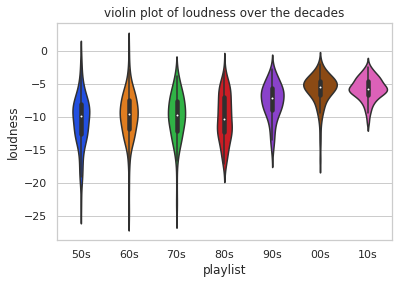

In [10]:
plt.title('violin plot of loudness over the decades')
ax = sns.violinplot(x=df['playlist'], y=df['loudness'])

There appears to be a sight general trend of increase in the loudness over the decades, although the 80's see a slight dip compared to surrounding decades. The 00's seem to have the loudest music. 

Now let's look at the valence. This is a measure of the musical positiveness of a track. Higher valence equates to happier songs. This ranges 0.0 to 1.0

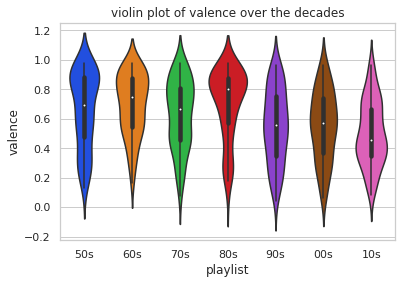

In [11]:
plt.title('violin plot of valence over the decades')
ax = sns.violinplot(x=df['playlist'], y=df['valence'])

This distribution shows high valence early on, peaking in the 80's then dropping hard into the 90's and forward. This could be due to any number of reasons, so I will not speculate as to why this is, but older music does seem happier in general.

Next up is song duration. This is measured in minutes.

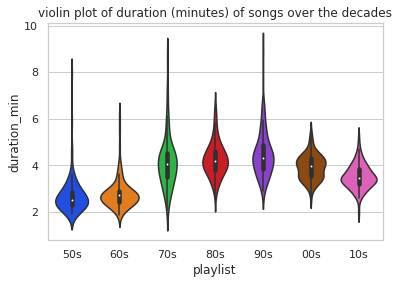

In [12]:
plt.title('violin plot of duration (minutes) of songs over the decades')
ax = sns.violinplot(x=df['playlist'], y=df['duration_min'])

Song duration appears to have been low (under 3 mins) early on then rose above 4 minutes for the 70's through 90's, then lowered back down a bit in the following years.

We can look at popularity of songs, however the popularity is determined by how much a song has been listened to recently and will therefore likely favor newer songs. Popularity is an integer ranging 0 to 100.

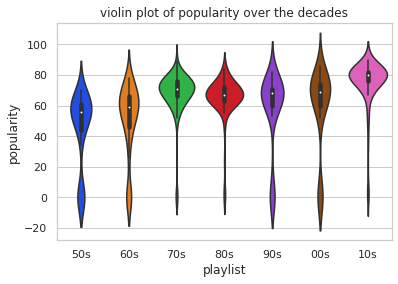

In [13]:
plt.title('violin plot of popularity over the decades')
ax = sns.violinplot(x=df['playlist'], y=df['popularity'])

The 10's have a clear lead over the other decades as far as popularity goes. This difference is perhaps less than what could be expected. The older decades seem to be quite popular still as well, and the relationship between time and popularity is quite weak. This suggests that people listen to the music they like, not necessarily what is new.

We will now look at explicit music over the decades. This is a boolean category. 

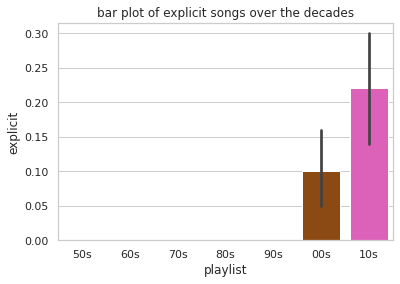

In [14]:
plt.title('bar plot of explicit songs over the decades')
ax = sns.barplot(x=df['playlist'], y=df['explicit'])

This chart is not too exciting, but it does show us something interesting. There are no explicit songs until the 00's, then the number jumps. This implies that explicit music was not popular until the 00's, then became a part of the mainstream. 

Next we will relate different variables to get a general look at music. First we will plot energy of music versus loudness.

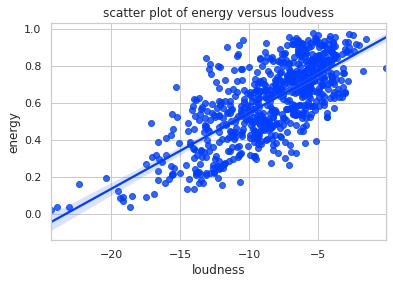

In [15]:
plt.title('scatter plot of energy versus loudvess')
ax = sns.regplot(x=df['loudness'], y=df['energy'])

We can see a pretty solid linear relationship here, implying that louder music is more energetic. This certainly seems like it makes sense as a soft lulaby is not as energetic as deafening rave music.

Another relationship we'll look at is loudness versus danceability.

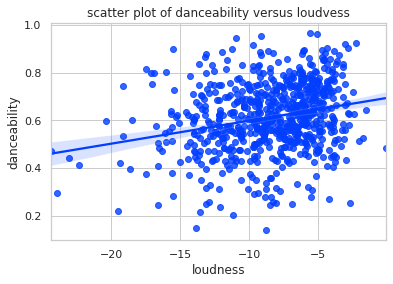

In [16]:
plt.title('scatter plot of danceability versus loudvess')
ax = sns.regplot(x=df['loudness'], y=df['danceability'])

The relationship here is a bit weaker than the previous.

Just for fun let's look at the top artists and the top keys of our tracks.

In [17]:
df['artist'].value_counts().head(15)

Various Artists      21
Lionel Richie         7
Whitney Houston       7
George Michael        6
Ed Sheeran            6
Elvis Presley         6
Michael Jackson       6
Buddy Holly           6
Frank Sinatra         5
Stevie Wonder         5
Coldplay              5
Simon & Garfunkel     5
Roxette               5
Rod Stewart           5
Phil Collins          5
Name: artist, dtype: int64

We can see some popular names on this list like Elvis Presley and Michael Jackson.

In [18]:
pitch_class = {
    0 : 'C',
    1 : 'C#/Db',
    2 : 'D',
    3 : 'D#/Eb',
    4 : 'E',
    5 : 'F',
    6 : 'F#/Gb',
    7 : 'G',
    8 : 'G#/Ab',
    9 : 'A',
    10 : 'A#/Bb',
    11 : 'B'
}

vc = pd.DataFrame()
vc = df['key'].value_counts()
vc.index = vc.index.map(pitch_class.get)
vc

C        87
F        82
C#/Db    78
D        74
G        72
A        62
E        51
A#/Bb    50
G#/Ab    46
B        38
F#/Gb    38
D#/Eb    22
Name: key, dtype: int64

It's no suprise that C is the most common key on this list, as it is one of the most popular keys for pop music.

## Part 4: Data Analysis

Now that we've done some exciting exploration and made some pretty graphs, let's see if we can move on to something more useful. Since we're looking at decades of music and each decade is has a different 'sound', a natural question arises: can we predict which decade a track is from based on its musical characteristics. We'll apply some machine learning techniques to answer this.

There are two ways we can go about this:
1) We can take some songs off each decades playlist to use as testing data and keep the rest for training data.

2) We can use all of the data we have here for training data and find a new playlist for testing data.

Since we have a large amount of data already clean and ready to use, we will go with the first option. An extra 20 songs likely will not make too much of a difference here. We will however use two methods of splitting the data: we will manually split the data such that we get a random 80:20 from each decade, and we will also use 10-fold cross validation which will not have the even decades split.

For good measure, we'll use two types of machine learning: decision trees and support vector machines.

Here we will split the data into training and testing sets. We'll use a split of 80:20 for this. Since our data has 700 tracks, we'll have 140 for testing, 20 from each decade. This is where the numerical dataframe we made earlier will be used.

In [19]:
from sklearn.model_selection import train_test_split

# create the training and testing frames
X_train = pd.DataFrame() 
X_test = pd.DataFrame()

group = numerical.groupby(['playlist']) # group the data by decade

i = 0
for playlist, g in group: # for each decade
    X = g.copy()
    y = X['playlist']
    
    X_t, X_te, y_t, y_tr = train_test_split(X, y, random_state=1, test_size=0.20) # gets a random 80:20 train-test split
    
    # compile the train and test data from each decade into two larger dataframes
    if i == 0:
        X_train = X_t
        X_test = X_te
    else:
        X_train = pd.concat([X_train, X_t], ignore_index=True)
        X_test = pd.concat([X_test, X_te], ignore_index=True)
    i += 1
    
# here we set the y values for the train and test sets, then drop the 'playlist' label from the X frames
y_train = X_train['playlist']
X_train.drop(columns='playlist', inplace=True)
y_test = X_test['playlist']
X_test.drop(columns='playlist', inplace=True)

# this set is to be used for 10-fold cross validation
X = numerical.copy()
y = X['playlist']
X.drop(columns='playlist', inplace=True)

Starting with the decision tree, we will create the model, train it on the training data, then test it on the test data. We will also perform a 10-fold cross validation on this model.

In [20]:
import sklearn
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from scipy import stats

    
dtc = tree.DecisionTreeClassifier() # creates the decision tree model
dtc_fit = dtc.fit(X_train, y_train) # fit the model

y_predict = dtc_fit.predict(X_test) # apply the model to the test set

acc = accuracy_score(y_test, y_predict) # check the accuracy of the model test results

scoresT = cross_val_score(dtc, X, y, cv=10) # 10-fold cross validation

print("Accuracy: %0.2f" % acc) #
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresT.mean(), scoresT.std() * 2)) 

Accuracy: 0.34
Accuracy: 0.42 (+/- 0.17)


An accuracy score of ~36% is not too great. However, randomly guessing has ~14% accuracy score and 36 is more than double that, so obviously the model does something.

The accuracy for 10-fold cross validation is higher than the train test accuracy score. This makes sense because each fold removes a section of the data to use for testing, and it is likely that that section will largely be from one decade. Basically, because the train testing data in the cross validation is not evenly distributed over decades, we can expect a higher accuracy. Also notice that the error on this accuracy is not insignificant.

Now we'll use the support vector machines model. The accuracy here does not change between iterations.

In [21]:
from sklearn import svm

svc = svm.SVC()
svc_fit = svc.fit(X_train, y_train)

y_predict = svc_fit.predict(X_test)

acc = accuracy_score(y_test, y_predict) # accuracy of model test results

scoresS = cross_val_score(svc, X, y, cv=10) # 10-fold cross validation

print("Accuracy: %0.2f" % acc)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresS.mean(), scoresS.std() * 2)) 

Accuracy: 0.27
Accuracy: 0.26 (+/- 0.11)


We see here a lower accuracy of ~27%. This accuracy is still better than guessing, but not good. The cross validation accuracy is much closer now to the train-test split accuracy and is actually slightly lower. This is likely due to how the model functions.


Unfortunately, neither of our models have particularly high accuracies. This basically means music is not particularly predictable with respects to time period.

In [22]:
stat, p = stats.ttest_rel(scoresT, scoresS)
print("p-value: %0.3f" % p)

p-value: 0.002


Here we have done a quick paired t-test on the results of the two 10-fold cross validations. The p-value is less than 0.05 which means there is likely no relationship between the outcomes of these two models. This checks out because we are applying two different machine learning models to the data and neither one is particularly good at predicting the decades of music, and this more or less validates our assumption from above about music being poorly predictable.

## Part 5: Data Interpretation

From the analysis we have done, it seems like different characteristics of music have different relationships with music over time. For example, we can see from the violin plots that acousticness has a noticble decrease over time and explicitness strictly increases with the decades. But then looking at something like popularity, we can see that there is not necesarily a relationship with time, since people tend to listen to the time period of music which they prefer.

Because of the significant variety in how musical characteristics relate to time period, we had trouble finding a model that could predict the decade of a song based on its audio features. The models we created had low accuracy, and while better than guessing, were certainly not good predictors.

A way in which this could be improved (and I leave this as a challenge to the reader) would be to create models for each feature of the tracks i.e. a model for danceability, a model for valence, etc. I estimate some of these models would give significantly better predictions, such as the model for acousticness, whereas others would likely not have any serious improvement over the ones we created already.

Another potential change for this analysis would be to get music from similar genres. The songs we collected are all popular songs from their specific time period, but cover a wide variety of genres, which results in many different sounds even within a decade. Selecting one or a few genres to analyze over the decades would then look at how that specific genre changed over the years and may yield some interesting results.

While we were not able to predict the decade of music based on its characteristics, we certainly have left some doors open for further exploration into this area. 

Music always has been and always will be a major part of people's lives. Technology is advancing more and more everyday, allowing for new and exciting ways to make music as well as listen to music. Companies like Spotify providing the data we used have created some interesting opportunities for some serious analysis of the music industry.

## Some Resources

Guide to using Spotify API: https://towardsdatascience.com/how-to-create-large-music-datasets-using-spotipy-40e7242cc6a6

Spotipy documentation: https://spotipy.readthedocs.io/en/2.16.1/#api-reference

Track object: https://developer.spotify.com/documentation/web-api/reference/tracks/get-track/

Audio features descriptions: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/